# BAGGING CLASSIFIER ALGORITHEM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('CARDIO.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
df=df.dropna()

In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
x1 = df.drop(labels='target', axis=1)
y1 = df.loc[:,'target']

In [7]:
# import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
# from sklearn.utils.metaestimators import if_delegate_has_method

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({1: 526, 0: 499})
OVER SAMPLING DATA COUNT  :  Counter({0: 526, 1: 526})


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  841
NUMBER OF TEST DATASET      :  211
TOTAL NUMBER OF DATASET    :  1052


In [9]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  841
NUMBER OF TEST DATASET      :  211
TOTAL NUMBER OF DATASET    :  1052


In [10]:
from sklearn.ensemble import BaggingClassifier

In [11]:
BAG = BaggingClassifier()
BAG.fit(x_train,y_train)

BaggingClassifier()

In [12]:
predicted = BAG.predict(x_test)

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print('THE CONFUSION MATRIX SCORE OF BAGGING CLASSIFIER:\n\n\n',cm)

THE CONFUSION MATRIX SCORE OF BAGGING CLASSIFIER:


 [[106   0]
 [  0 105]]


In [14]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(BAG, x, y, scoring='accuracy')
print('THE CROSS VALIDATION TEST RESULT OF ACCURACY :\n\n\n', accuracy*100)

THE CROSS VALIDATION TEST RESULT OF ACCURACY :


 [ 98.1042654  100.          99.04761905  98.57142857  98.0952381 ]


In [15]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,predicted)
print("THE ACCURACY SCORE OF BAGGING CLASSIFIER IS :",a*100)

THE ACCURACY SCORE OF BAGGING CLASSIFIER IS : 100.0


In [16]:
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test,predicted)
print("THE HAMMING LOSS OF BAGGING CLASSIFIER IS :",hl*100)

THE HAMMING LOSS OF BAGGING CLASSIFIER IS : 0.0


In [17]:
from sklearn.metrics import precision_score
P = precision_score(y_test,predicted)
print("THE PRECISION SCORE OF BAGGING CLASSIFIER IS :",P*100)

THE PRECISION SCORE OF BAGGING CLASSIFIER IS : 100.0


In [18]:
from sklearn.metrics import recall_score
R = recall_score(y_test,predicted)
print("THE RECALL SCORE OF BAGGING CLASSIFIER IS :",R*100)

THE RECALL SCORE OF BAGGING CLASSIFIER IS : 100.0


In [19]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,predicted)
print("THE PRECISION SCORE OF BAGGING CLASSIFIER IS :",f1*100)

THE PRECISION SCORE OF BAGGING CLASSIFIER IS : 100.0


THE CONFUSION MATRIX SCORE OF BAGGING CLASSIFIER:


[[106   0]
 [  0 105]]


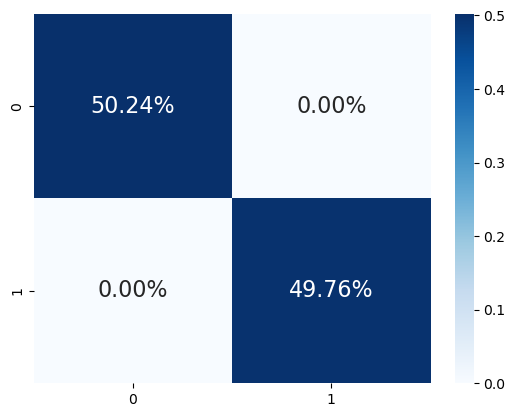

In [20]:
def plot_confusion_matrix(cm, title='THE CONFUSION MATRIX SCORE OF BAGGING CLASSIFIER\n\n', cmap=plt.cm.Blues):
    target_names=['']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm=confusion_matrix(y_test, predicted)
print('THE CONFUSION MATRIX SCORE OF BAGGING CLASSIFIER:\n\n')
print(cm)

sns.heatmap(cm/np.sum(cm), annot=True, cmap = 'Blues', annot_kws={"size": 16},fmt='.2%')
plt.show()

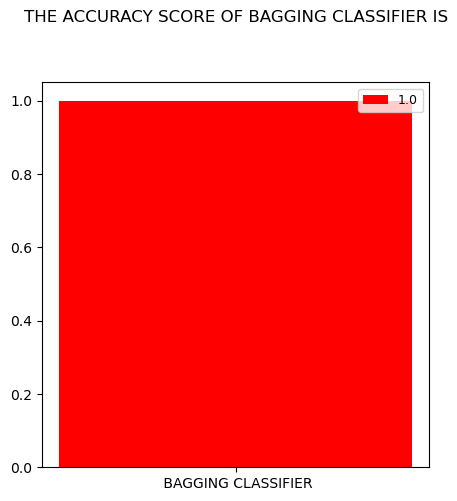

In [21]:
def graph():
    import matplotlib.pyplot as plt
    data=[a]
    alg=" BAGGING CLASSIFIER"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("RED"))
    plt.title("THE ACCURACY SCORE OF BAGGING CLASSIFIER IS\n\n\n")
    plt.legend(b,data,fontsize=9)
graph()

In [22]:
import joblib
joblib.dump(BAG, 'CARDIO.pkl')

['CARDIO.pkl']

In [23]:
# import warnings
# warnings.filterwarnings('ignore')
# import pandas as pd
# from ydata_profiling import ProfileReport
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# from imblearn.over_sampling import SMOTE
# import seaborn as sns
# import matplotlib.pyplot as plt
# from io import BytesIO
# import base64
# from IPython.core.display import HTML

# # Sample dataframe
# df = pd.read_csv("CARDIO.csv")

# df.head()

# df.columns

# df = df.dropna()



# # Generate basic data profiling report
# prof = ProfileReport(df)
# prof.to_file(output_file='cardio.html')

# # Split the data
# X = df.drop("target", axis=1)
# y = df["target"]
# # Apply SMOTE to handle class imbalance
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

# # Split the resampled data
# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# # Train Random Forest Classifier
# clf = RandomForestClassifier(random_state=42)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)

# # Generate Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# fig, ax = plt.subplots()
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
# ax.set_xlabel('Predicted')
# ax.set_ylabel('Actual')
# ax.set_title('Confusion Matrix')

# # Save confusion matrix plot to HTML-compatible format
# buf = BytesIO()
# plt.savefig(buf, format='png')
# plt.close(fig)
# buf.seek(0)
# img_str = base64.b64encode(buf.read()).decode('utf-8')
# img_tag = f'<img src="data:image/png;base64,{img_str}" />'

# # Generate Classification Report
# class_report = classification_report(y_test, y_pred, output_dict=True)
# class_report_df = pd.DataFrame(class_report).transpose()

# # Convert classification report dataframe to HTML
# class_report_html = class_report_df.to_html()

# # Create a separate report HTML for metrics
# metrics_html = f"""
# <!DOCTYPE html>
# <html>
# <head>
#     <title>Metrics Report</title>
# </head>
# <body>
#     <h1>Metrics Report</h1>
#     <h2>Confusion Matrix</h2>
#     {img_tag}
#     <h2>Classification Report</h2>
#     {class_report_html}
#     <h2>Accuracy</h2>
#     <p>{accuracy}</p>
# </body>
# </html>
# """

# # Save the metrics report to a new HTML file
# with open('Metrics_report.html', 'w') as file:
#     file.write(metrics_html)

# print("Metrics report saved as Metrics_report.html")